# Stitch Fix Walkthrough

I just want to get the basics down, so just following along with:

https://multithreaded.stitchfix.com/blog/2015/12/09/intro-to-chainer/

In [1]:
#Matplotlib and NumPy
import numpy as np
import matplotlib.pyplot as plt

#Chainer Specific
from chainer import Variable, optimizers, serializers, Chain
import chainer.functions as F
import chainer.links as L

### Linear Regression

In [2]:
x = 30*np.random.rand(40).astype(np.float32)
y = (7*x + 10) + 30*np.random.rand(40).astype(np.float32)

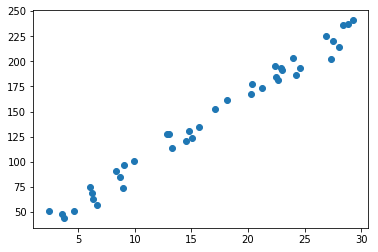

In [3]:
plt.scatter(x, y)

In [4]:
x_var = Variable(x.reshape(40, -1))
y_var = Variable(y.reshape(40, -1))

In [5]:
linear_function = L.Linear(None, 1)

In [6]:
def linear_forward(data):
    return linear_function(data)

In [7]:
optimizer = optimizers.MomentumSGD(lr=0.001)
optimizer.setup(linear_function)

In [8]:
def linear_train(train_data, train_target, n_epoch=200):
    
    for _ in range(n_epoch):
        
        output = linear_forward(train_data)
        
        loss = F.mean_squared_error(train_target, output)
        
        linear_function.cleargrads()
        
        loss.backward()
        
        optimizer.update()

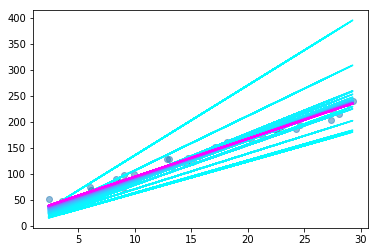

In [9]:
plt.scatter(x, y, alpha=0.5)
for i in range(150):
    linear_train(x_var, y_var, n_epoch=5)
    y_pred = linear_forward(x_var).data
    plt.plot(x, y_pred, color=plt.cm.cool(i/150.))

### Logistic Regression

In [64]:
x = 30*np.random.rand(40).astype(np.float32)
y = (7*x + 10) + 30*np.random.rand(40).astype(np.float32)
y_log = y > y.mean()

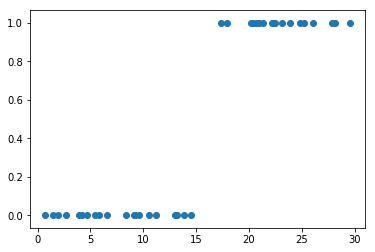

In [65]:
plt.scatter(x, y_log)

In [66]:
x_var = Variable(x.reshape(40, -1))
y_var = Variable(y_log.reshape(40, -1).astype(np.int32), requires_grad=False)

In [67]:
linear_function = L.Linear(None, 1)

In [73]:
def linear_forward(data):
    return linear_function(data)

In [74]:
optimizer = optimizers.MomentumSGD(lr=0.001)
optimizer.setup(linear_function)

In [82]:
def linear_train(train_data, train_target, n_epoch=200):
    
    for _ in range(n_epoch):
        
        output = linear_forward(train_data)
        
        loss = F.sigmoid_cross_entropy(output, train_target) + F.sum(abs(linear_function.W))
        
        linear_function.cleargrads()
        
        loss.backward()
        
        optimizer.update()

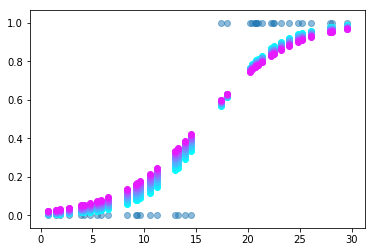

In [83]:
plt.scatter(x, y_log, alpha=0.5)
for i in range(10):
    linear_train(x_var, y_var, n_epoch=1000)
    y_pred = F.sigmoid(linear_forward(x_var)).data
    order = np.argsort(x)
    plt.scatter(x[order], y_pred[order], color=plt.cm.cool(i/10.))